## Import & Conf

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

# Build the api

In [233]:
headers = {
  'Referer': 'https://stats.nba.com/players/shots-dribbles',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
  'x-nba-stats-origin': 'stats'
}

In [234]:
def get_shooting_stats(  url="http://stats.nba.com/stats/leaguedashplayerptshot?",
                PerMode="PerGame",
                LeagueID = "00",
                Season = "2019-20",
                SeasonType = "Regular Season",
                PORound= 0,
                CloseDefDistRange= '',
                ShotClockRange='',
                ShotDistRange= '',#'> 5',
                TouchTimeRange= '',
                DribbleRange= "0 Dribbles",
                GeneralRange= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0):
    url = url
    api_param = {
    "PerMode": PerMode,
    "LeagueID": LeagueID,
    "Season": Season,
    "SeasonType": SeasonType,
    "PORound": PORound,
    "CloseDefDistRange": CloseDefDistRange,#'0-2 Feet - Very Tight',
    "ShotClockRange":ShotClockRange,
    "ShotDistRange": ShotDistRange,#'> 5',
    "TouchTimeRange": TouchTimeRange,
    "DribbleRange": DribbleRange,
    "GeneralRange": GeneralRange,
    "TeamID": TeamID,
    "Outcome": Outcome,
    "Location": Location,
    "Month": Month,
    "SeasonSegment": SeasonSegment,
    "DateFrom": DateFrom,
    "DateTo": DateTo,
    "OpponentTeamID": OpponentTeamID,
    "VsConference": VsConference,
    "VsDivision": VsDivision,
    "Conference": Conference,
    "Division": Division,
    "GameSegment": GameSegment,
    "Period": Period,
    "LastNGames": LastNGames
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
    df["CloseDefDistRange"] = CloseDefDistRange
    df["DribbleRange"] = DribbleRange
    return df

def seasons_string(start,end):
    '''
    creates a list of NBA seasons from start-end
    '''
    years = np.arange(start,end+1)
    seasons = []
    for year in years:
        string1 = str(year)
        string2 = str(year+1)
        season = '{}-{}'.format(string1,string2[-2:])
        seasons.append(season)
    return seasons

def get_usg_stats(  url="http://stats.nba.com/stats/leaguedashplayerstats?",
                MeasureType= "Advanced",
                PerMode= "PerGame",
                PlusMinus= "N",
                PaceAdjust= "N",
                Rank= "N",
                LeagueID= "00",
                Season= "2019-20",
                SeasonType= "Regular Season",
                PORound= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                TeamID= 0,
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                ShotClockRange= '',
                LastNGames= 0,
                GameScope= '',
                PlayerExperience= '',
                PlayerPosition= '',
                StarterBench= '',
                DraftYear= '',
                DraftPick= '',
                College= '',
                Country= '',
                Height= '',
                Weight= '',
                TwoWay= 0):
    url = url
    api_param = {
    "MeasureType":MeasureType,
    "PerMode":PerMode,
    "PlusMinus":PlusMinus,
    "PaceAdjust":PaceAdjust,
    "Rank":Rank,
    "LeagueID":LeagueID,
    "Season":Season,
    "SeasonType":SeasonType,
    "PORound":PORound,
    "Outcome":Outcome,
    "Location":Location,
    "Month":Month,
    "SeasonSegment":SeasonSegment,
    "DateFrom":DateFrom,
    "DateTo":DateTo,
    "OpponentTeamID":OpponentTeamID,
    "VsConference":VsConference,
    "VsDivision":VsDivision,
    "TeamID":TeamID,
    "Conference":Conference,
    "Division":Division,
    "GameSegment":GameSegment,
    "Period":Period,
    "ShotClockRange":ShotClockRange,
    "LastNGames":LastNGames,
    "GameScope":GameScope,
    "PlayerExperience":PlayerExperience,
    "PlayerPosition":PlayerPosition,
    "StarterBench":StarterBench,
    "DraftYear":DraftYear,
    "DraftPick":DraftPick,
    "College":College,
    "Country":Country,
    "Height":Height,
    "Weight":Weight,
    "TwoWay":TwoWay
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
#     df["CloseDefDistRange"] = CloseDefDistRange
#     df["DribbleRange"] = DribbleRange
    return df


def get_def_diff_pct_stats(url="https://stats.nba.com/stats/leaguedashptdefend?",
                PerMode= "PerGame",
                LeagueID= "00",
                Season= "2019-20",
                SeasonType= "Regular Season",
                PORound= 0,
                PlayerID= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0,
                DraftYear= '',
                DraftPick= '',
                College= '',
                Country= '',
                Height= '',
                Weight= '',
                PlayerExperience= '',
                PlayerPosition= '',
                StarterBench= '',
                DefenseCategory= "Overall"):
    url = url
    api_param = {
    "PerMode":PerMode,
    "LeagueID":LeagueID,
    "Season":Season,
    "SeasonType":SeasonType,
    "PORound":PORound,
    "PlayerID":PlayerID,
    "TeamID":TeamID,
    "Outcome":Outcome,
    "Location":Location,
    "Month":Month,
    "SeasonSegment":SeasonSegment,
    "DateFrom":DateFrom,
    "DateTo":DateTo,
    "OpponentTeamID":OpponentTeamID,
    "VsConference":VsConference,
    "VsDivision":VsDivision,
    "Conference":Conference,
    "Division":Division,
    "GameSegment":GameSegment,
    "Period":Period,
    "LastNGames":LastNGames,
    "DraftYear":DraftYear,
    "DraftPick":DraftPick,
    "College":College,
    "Country":Country,
    "Height":Height,
    "Weight":Weight,
    "PlayerExperience":PlayerExperience,
    "PlayerPosition":PlayerPosition,
    "StarterBench":StarterBench,
    "DefenseCategory":DefenseCategory
}

    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
#     df["CloseDefDistRange"] = CloseDefDistRange
#     df["DribbleRange"] = DribbleRange
    return df
    
def get_shooting_stats(  url="http://stats.nba.com/stats/leaguedashplayerptshot?",
                PerMode="PerGame",
                LeagueID = "00",
                Season = "2019-20",
                SeasonType = "Regular Season",
                PORound= 0,
                CloseDefDistRange= '',
                ShotClockRange='',
                ShotDistRange= '',#'> 5',
                TouchTimeRange= '',
                DribbleRange= "0 Dribbles",
                GeneralRange= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0):
    url = url
    api_param = {
    "PerMode": PerMode,
    "LeagueID": LeagueID,
    "Season": Season,
    "SeasonType": SeasonType,
    "PORound": PORound,
    "CloseDefDistRange": CloseDefDistRange,#'0-2 Feet - Very Tight',
    "ShotClockRange":ShotClockRange,
    "ShotDistRange": ShotDistRange,#'> 5',
    "TouchTimeRange": TouchTimeRange,
    "DribbleRange": DribbleRange,
    "GeneralRange": GeneralRange,
    "TeamID": TeamID,
    "Outcome": Outcome,
    "Location": Location,
    "Month": Month,
    "SeasonSegment": SeasonSegment,
    "DateFrom": DateFrom,
    "DateTo": DateTo,
    "OpponentTeamID": OpponentTeamID,
    "VsConference": VsConference,
    "VsDivision": VsDivision,
    "Conference": Conference,
    "Division": Division,
    "GameSegment": GameSegment,
    "Period": Period,
    "LastNGames": LastNGames
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
    df["CloseDefDistRange"] = CloseDefDistRange
    df["DribbleRange"] = DribbleRange
    return df

# Conf

In [930]:
minimum_games = 20
minimum_minuites_per_game = 20
start_season = 2017
end_season = 2019

## functions

In [931]:
def games_filter(df):
    return df[(df["GP"] > minimum_games)]
def minuites_filter(df):
    return df[(df["MIN"] > minimum_minuites_per_game)]

## Shooting analytics

## Conf

In [1076]:
min_shots_attempts = 30
dribbles = ["0 Dribbles","1 Dribble"]
CloseDefDistRanges = ['4-6 Feet - Open'] #['0-2 Feet - Very Tight','2-4 Feet - Tight','4-6 Feet - Open','']#['4-6 Feet - Open']#
columns = ["PLAYER_NAME","FG3A","CloseDefDistRange","DribbleRange","FG3M","GP","Season","FGA"]

## Read From API

In [1077]:
df = []
all_shots_df = []
for season in seasons_string(start_season,end_season):
    all_shots_df.append(get_shooting_stats(Season=season,CloseDefDistRange='',DribbleRange=''))
    for dribble in dribbles:
        for closeDefDistRange in CloseDefDistRanges:
            df.append(get_shooting_stats(Season=season,CloseDefDistRange=closeDefDistRange,DribbleRange=dribble))
shooting_stats_df = pd.concat([x for x in df],ignore_index=True)
all_shots_df = pd.concat([x for x in all_shots_df],ignore_index=True)

In [1078]:
avg_shooting_pct = (shooting_stats_df["FG3M"] * shooting_stats_df["GP"]).sum() / (shooting_stats_df["FG3A"] * shooting_stats_df["GP"]).sum()
avg_shooting_pct

0.35044882315258497

In [1079]:
df_3pt = shooting_stats_df

df_3pt["TOTAL_ATTEMPTS"] = round(df_3pt["GP"] * df_3pt["FG3A"])
df_3pt["TOTAL_MADE"] = df_3pt["GP"] * df_3pt["FG3M"]

all_shots_df["TOTAL_3s"] = round(all_shots_df["GP"] * all_shots_df["FG3A"])
all_shots_df["TOTAL_Shots"] = all_shots_df["GP"] * all_shots_df["FGA"]

df_3pt = shooting_stats_df[["PLAYER_NAME","TOTAL_ATTEMPTS","CloseDefDistRange","DribbleRange","TOTAL_MADE","GP","Season","FGA"]].groupby("PLAYER_NAME",as_index=False).sum()
all_shots_df = all_shots_df.groupby("PLAYER_NAME",as_index=False).sum()

df_3pt["3pt_PCT"] = df_3pt["TOTAL_MADE"] / df_3pt["TOTAL_ATTEMPTS"]

all_shots_df["FREQ_PCT"] = all_shots_df["TOTAL_3s"] / all_shots_df["TOTAL_Shots"]
all_shots_df = all_shots_df[["FREQ_PCT","PLAYER_NAME"]]
df_3pt = df_3pt.merge(all_shots_df)
avg_3pt_freq = all_shots_df["FREQ_PCT"].mean()
df_3pt

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,GP,FGA,3pt_PCT,FREQ_PCT
0,Aaron Brooks,4.0,1.92,32,0.13,0.480000,0.461823
1,Aaron Gordon,205.0,69.22,376,6.56,0.337659,0.354101
2,Aaron Harrison,8.0,0.99,18,1.00,0.123750,0.622918
3,Aaron Holiday,60.0,21.07,206,1.32,0.351167,0.437007
4,Aaron Jackson,0.0,0.00,1,2.00,NaN,0.444444
...,...,...,...,...,...,...,...
715,Zach Randolph,35.0,8.85,118,2.53,0.252857,0.203390
716,Zaza Pachulia,0.0,0.00,274,0.90,NaN,0.011901
717,Zhaire Smith,7.0,1.02,20,1.60,0.145714,0.422128
718,Zhou Qi,8.0,0.00,18,0.44,0.000000,0.611719


In [1107]:
is_shooting_3s_filter = ~shooting_stats_df["FG3_PCT"].isna()
min_attemps_filter = df_3pt["TOTAL_ATTEMPTS"] > min_shots_attempts
above_avg_freq_filter = df_3pt["FREQ_PCT"] > avg_3pt_freq
df_3pt = df_3pt[min_attemps_filter]
df_3pt = df_3pt[is_shooting_3s_filter]
df_3pt = df_3pt[above_avg_freq_filter]
df_3pt[df_3pt["PLAYER_NAME"] == "Avery Bradley"]
df_3pt[df_3pt["PLAYER_NAME"] == "Devonte' Graham"].sort_values("TOTAL_ATTEMPTS",ascending=False).head(60)

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,GP,FGA,3pt_PCT,FREQ_PCT
175,Devonte' Graham,135.0,51.9,208,2.75,0.384444,0.59918


In [1081]:
# shooting_stats_df["TOTAL_ATTEMPTS"] = round(shooting_stats_df["GP"] * shooting_stats_df["FG3A"])
# shooting_stats_df["TOTAL_MADE"] = shooting_stats_df["GP"] * shooting_stats_df["FG3M"]
# shooting_stats_df2 = shooting_stats_df.groupby(["PLAYER_NAME","CloseDefDistRange"],as_index=False).sum()
#shooting_stats_df2["FG3_PCT"] = shooting_stats_df2["FG3M"] / shooting_stats_df2["FG3A"] 
shooting_stats_df2[shooting_stats_df2["PLAYER_NAME"] == "Avery Bradley"][["CloseDefDistRange","TOTAL_ATTEMPTS","FG3_PCT"]]

,CloseDefDistRange,TOTAL_ATTEMPTS,FG3_PCT
180,0-2 Feet - Very Tight,8.0,0.352941
181,2-4 Feet - Tight,28.0,0.446429
182,4-6 Feet - Open,145.0,0.247350
183,6+ Feet - Wide Open,348.0,0.409426


# Usage Analytics

## Conf

In [1082]:
max_usg_pct = 0.25

## Read From API

In [1109]:
df = []
for season in seasons_string(start_season,end_season):
    df.append(get_usg_stats(Season=season))
usg_stats_df = pd.concat([x for x in df],ignore_index=True)
ast_pct_avg = usg_stats_df["AST_PCT"].mean()
usg_stats_df = usg_stats_df.groupby("PLAYER_NAME",as_index=False).max()

In [1112]:
usg_filter = usg_stats_df["USG_PCT"] <= max_usg_pct
ast_filter = usg_stats_df["AST_PCT"] <= ast_pct_avg
usg_stats_df = usg_stats_df[usg_filter]
usg_stats_df = usg_stats_df[ast_filter]
usg_stats_df = games_filter(usg_stats_df)
usg_stats_df = minuites_filter(usg_stats_df)


# Mesure Defense

## Conf 

In [1085]:
def_cols = ["PLAYER_NAME","PCT_PLUSMINUS","Season"]

## Read From API

In [1086]:
df = []
for season in seasons_string(start_season,end_season):
            df.append(get_def_diff_pct_stats(Season=season))
def_stats_df = pd.concat([x for x in df],ignore_index=True)

In [1087]:
def_stats_df = def_stats_df[def_cols]
def_stats_df["PCT_PLUSMINUS_CONVERTED"] = def_stats_df["PCT_PLUSMINUS"] * -100
avg_def_metric = def_stats_df["PCT_PLUSMINUS_CONVERTED"].mean()

# Visualize Results

In [1088]:
usage_3pt_merge = df_3pt[["PLAYER_NAME","3pt_PCT","TOTAL_ATTEMPTS","FREQ_PCT"]].sort_values("3pt_PCT",ascending=False).merge(usg_stats_df[["USG_PCT","PLAYER_NAME","Season","TEAM_ID","AST_PCT"]]).sort_values("3pt_PCT",ascending=False)
usage_3pt_merge = usage_3pt_merge[usage_3pt_merge["Season"] == "2019-20"]

# Merge Data Togheter

In [1089]:
def_3pt_usg_df = usage_3pt_merge.merge(def_stats_df,on=["PLAYER_NAME","Season"])
def_3pt_usg_df[def_3pt_usg_df["PLAYER_NAME"] == "James Harden"]

,PLAYER_NAME,3pt_PCT,TOTAL_ATTEMPTS,FREQ_PCT,USG_PCT,Season,TEAM_ID,AST_PCT,PCT_PLUSMINUS,PCT_PLUSMINUS_CONVERTED


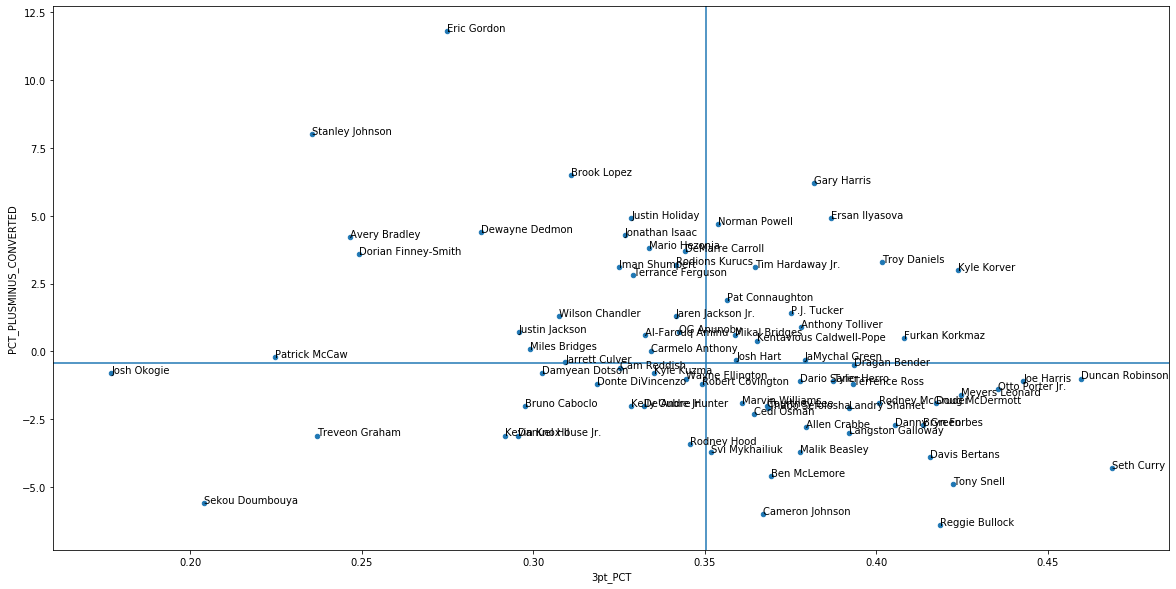

In [1090]:
ax = def_3pt_usg_df.plot.scatter(x="3pt_PCT",y="PCT_PLUSMINUS_CONVERTED",figsize=(20,10))
plt.axvline(avg_shooting_pct)
plt.axhline(avg_def_metric)
for i, txt in enumerate(def_3pt_usg_df.PLAYER_NAME):
    ax.annotate(txt, (def_3pt_usg_df["3pt_PCT"].iat[i],def_3pt_usg_df["PCT_PLUSMINUS_CONVERTED"].iat[i]))
plt.show()

In [1091]:
rpm_df = pd.read_excel("Desktop\\rpm.xlsx")
avg_rpm_df = rpm_df["DRPM"].mean()

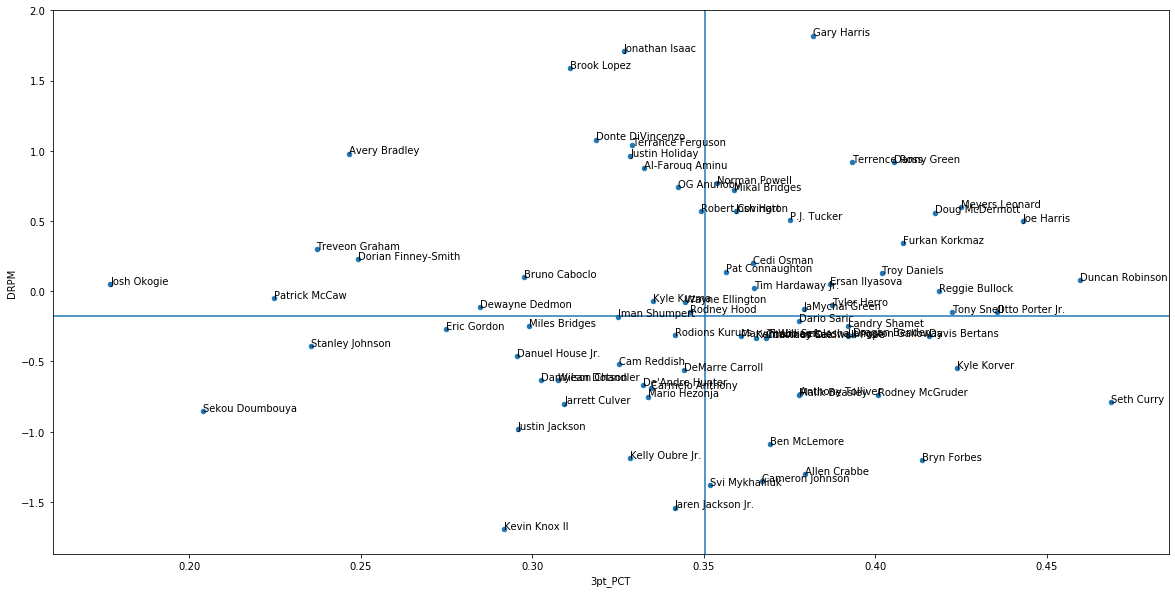

In [1092]:
rpm_3pt_usg_df = usage_3pt_merge.merge(rpm_df)
ax = rpm_3pt_usg_df.plot.scatter(x="3pt_PCT",y="DRPM",figsize=(20,10))
plt.axvline(avg_shooting_pct)
plt.axhline(avg_rpm_df)
for i, txt in enumerate(def_3pt_usg_df.PLAYER_NAME):
    ax.annotate(txt, (rpm_3pt_usg_df["3pt_PCT"].iat[i],rpm_3pt_usg_df["DRPM"].iat[i]))
plt.show()

In [1093]:
rpm_3pt_usg_df["DRPM_RANK"] = rpm_3pt_usg_df["DRPM"].rank(method='first',ascending=False)
rpm_3pt_usg_df["3PT_PCT_RANK"] = rpm_3pt_usg_df["3pt_PCT"].rank(method='first',ascending=False)


In [1094]:
rpm_3pt_usg_df["total_rank"] = (rpm_3pt_usg_df["DRPM_RANK"] + rpm_3pt_usg_df["3PT_PCT_RANK"])/2

In [1095]:
rpm_3pt_usg_df_filtered = rpm_3pt_usg_df[rpm_3pt_usg_df["DRPM"] > avg_rpm_df]
rpm_3pt_usg_df_filtered = rpm_3pt_usg_df_filtered[rpm_3pt_usg_df_filtered["3pt_PCT"] > avg_shooting_pct]
rpm_3pt_usg_df_filtered.sort_values("total_rank",ascending=True)[["PLAYER_NAME","DRPM_RANK","3PT_PCT_RANK","FREQ_PCT","AST_PCT","TOTAL_ATTEMPTS"]]

,PLAYER_NAME,DRPM_RANK,3PT_PCT_RANK,FREQ_PCT,AST_PCT,TOTAL_ATTEMPTS
4,Meyers Leonard,14.0,5.0,0.472517,0.123,66.0
12,Danny Green,8.0,13.0,0.657615,0.089,327.0
2,Joe Harris,19.0,3.0,0.547935,0.114,421.0
21,Gary Harris,1.0,22.0,0.417747,0.128,295.0
16,Terrence Ross,9.0,17.0,0.557996,0.103,325.0
8,Doug McDermott,17.0,9.0,0.488878,0.080,261.0
1,Duncan Robinson,27.0,2.0,0.864534,0.067,208.0
11,Furkan Korkmaz,20.0,12.0,0.609289,0.107,171.0
13,Troy Daniels,25.0,14.0,0.762051,0.052,309.0
7,Reggie Bullock,31.0,8.0,0.588605,0.096,261.0


In [992]:
salaries_df = pd.read_excel("Desktop\salaries.xlsx")

In [993]:
rpm_3pt_usg_df_filtered.merge(salaries_df[["PLAYER_NAME","2019-20","2020-21"]]).sort_values("total_rank",ascending=True)[["PLAYER_NAME","2019-20","2020-21"]]

,PLAYER_NAME,2019-20,2020-21
1,Danny Green,"$14,634,146","$15,365,854"
0,Joe Harris,"$7,670,000",NaN
3,Terrence Ross,"$12,500,000","$13,500,000"
2,Troy Daniels,"$2,028,594",NaN
4,Josh Hart,"$1,934,160","$3,491,159"


In [994]:
rpm_3pt_usg_df[rpm_3pt_usg_df["PLAYER_NAME"] == "Davis Bertans"]

,PLAYER_NAME,3pt_PCT,TOTAL_ATTEMPTS,FREQ_PCT,USG_PCT,Season,TEAM_ID,AST_PCT,RK,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,DRPM_RANK,3PT_PCT_RANK,total_rank
1,Davis Bertans,0.415736,401.0,0.741555,0.178,2019-20,1610612764,0.102,251,WSH,48,29.4,2.22,-0.32,1.91,2.97,13.0,2.0,7.5


In [995]:
rpm_3pt_usg_df_filtered_worst = rpm_3pt_usg_df#[rpm_3pt_usg_df["DRPM"] < avg_rpm_df]
#rpm_3pt_usg_df_filtered_worst = rpm_3pt_usg_df_filtered_worst[rpm_3pt_usg_df_filtered_worst["3pt_PCT"] < avg_shooting_pct]
rpm_3pt_usg_df_filtered_worst.sort_values("total_rank",ascending=False)

,PLAYER_NAME,3pt_PCT,TOTAL_ATTEMPTS,FREQ_PCT,USG_PCT,Season,TEAM_ID,AST_PCT,RK,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,DRPM_RANK,3PT_PCT_RANK,total_rank
18,Kelly Oubre Jr.,0.328454,388.0,0.421861,0.223,2019-20,1610612764,0.067,458,PHX,56,34.5,-1.01,-1.19,-2.20,-1.48,18.0,19.0,18.5
19,Eric Gordon,0.274843,382.0,0.649451,0.238,2019-20,1610612745,0.113,235,HOU,30,29.2,1.11,-0.27,0.84,1.19,12.0,20.0,16.0
15,DeMarre Carroll,0.344303,323.0,0.538503,0.194,2019-20,1610612751,0.109,355,HOU/SA,18,10.1,-0.53,-0.56,-1.09,0.00,16.0,16.0,16.0
7,Allen Crabbe,0.379396,331.0,0.669855,0.183,2019-20,1610612751,0.082,464,ATL/MIN,37,17.6,-1.48,-1.30,-2.77,-0.78,20.0,8.0,14.0
16,Kyle Kuzma,0.335238,378.0,0.409274,0.233,2019-20,1610612747,0.113,193,LAL,48,24.5,0.55,-0.07,0.49,1.26,9.0,17.0,13.0
8,Anthony Tolliver,0.378146,302.0,0.796822,0.144,2019-20,1610612765,0.076,394,POR/SAC,42,15.1,-2.07,-0.73,-2.80,-0.72,17.0,9.0,13.0
10,Kentavious Caldwell-Pope,0.365331,332.0,0.534260,0.175,2019-20,1610612747,0.093,262,LAL,57,25.4,0.39,-0.33,0.06,1.10,15.0,11.0,13.0
14,Wayne Ellington,0.344504,373.0,0.828222,0.167,2019-20,1610612765,0.093,196,NY,29,15.1,-0.43,-0.08,-0.50,0.16,10.0,15.0,12.5
2,Bryn Forbes,0.413681,383.0,0.546418,0.186,2019-20,1610612759,0.105,459,SA,57,25.2,-0.26,-1.20,-1.45,-0.36,19.0,3.0,11.0
6,Langston Galloway,0.391974,385.0,0.639802,0.188,2019-20,1610612765,0.105,252,DET,61,25.8,0.15,-0.32,-0.17,0.93,14.0,7.0,10.5
